In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import numpy as np
import random as rd
from datetime import datetime
from keras import *
from keras.utils import to_categorical
from keras.optimizers import Adam
import modelos
import util

In [47]:
Path='/home/familia/Documentos/spectral'
Data_Folder = os.listdir(Path)
Data_Folder.sort(key=str.lower)
o=[]
nameso=[]
b=[]
namesb=[]
k=1
for i in range(len(Data_Folder)):
    if 'IACOBB' in Data_Folder[i]:
        starB=os.listdir(Path+'/'+Data_Folder[i])
        for j in range(len(starB)):
            if 'fits' in Path+'/'+Data_Folder[i]+'/'+starB[j]:
                temp=fits.open(Path+'/'+Data_Folder[i]+'/'+starB[j])
                temp1=temp[0].data;
                b.append(temp1)
                namesb.append(starB[j][:starB[j].index('_')])
    elif 'IACOBO' in Data_Folder[i]:
        starO=os.listdir(Path+'/'+Data_Folder[i])
        for j in range(len(starO)):
            if 'fits' in Path+'/'+Data_Folder[i]+'/'+starO[j]:
                temp=fits.open(Path+'/'+Data_Folder[i]+'/'+starO[j])
                temp1=temp[0].data;
                o.append(temp1)    

IMPORTANT The spectrum is NOT corrected from barycentric velocity                [astropy.io.fits.card]
IMPORTANT Use the keyword I_VBAR below to correct from barycentric velocity      [astropy.io.fits.card]
IMPORTANT This fits file includes a normalized and the orig. merged spect.       [astropy.io.fits.card]
VERY IMPORTANT ** The I_SPC keyword below is only orientative, no definitive. ** [astropy.io.fits.card]
VERY IMPORTANT ** Please, use it carefully, not as a reference !!!            ** [astropy.io.fits.card]
IMPORTANT Use the keyword I_VBAR to correct from barycentric velocity            [astropy.io.fits.card]


In [2]:
begin=4000
fin=40000
ventana=fin-begin
paso=ventana

In [14]:
b,bnames,o,onames=util.extraer_datos_IACOB(0,begin,fin);

In [20]:
print(len(b),len(o))

279 49


In [49]:
begin=4000
fin=40000
ventana=fin-begin
paso=ventana
temp1=np.zeros((len(b),fin-begin))
labelb=np.zeros(len(b))+1
temp3=np.zeros((len(o),fin-begin))
labelo=np.zeros(len(o))

for i in range(len(b)):
    tata=np.array(b[i][1][begin:fin]).astype('float64')
    temp1[i]=tata
for i in range(len(o)):
    tata=np.array(o[i][1][begin:fin]).astype('float64')
    temp3[i]=tata

In [50]:
esnan=np.isnan(temp1)
for i in range(len(esnan)):
    erro=np.argwhere(np.isnan(temp1[i]))
    if len(erro)>1:
        print(i,len(erro))

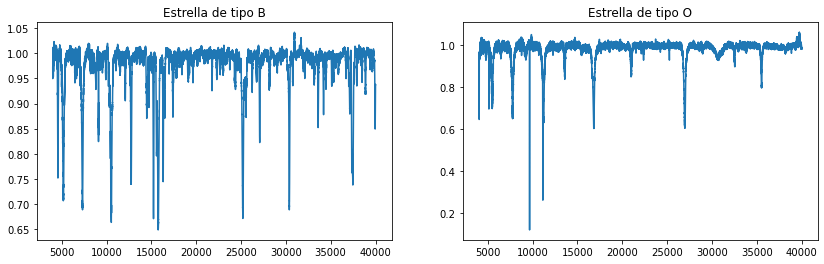

In [22]:
ejex=[i for i in range(begin,begin+ventana)]

plt.figure(figsize=(14, 4))
ax = plt.subplot(121)
plt.plot(ejex,b[5])
plt.title('Estrella de tipo B')

plt.subplot(122)
plt.plot(ejex,o[5])
plt.title('Estrella de tipo O')
plt.show()

In [37]:
cuantos=len(b)
extra=1000
BPartes=[i for i in range(cuantos)]
OPartes=[i+extra for i in range(len(o))]
rd.seed(datetime.now())
empaquetar = BPartes+OPartes
print(empaquetar)
rd.shuffle(empaquetar)
print(empaquetar)
namesAll=[]
lista1=[]
lista2=[]
for i in range(len(empaquetar)):
    if empaquetar[i] >= extra:
        lista1.append(o[empaquetar[i]-extra])
        lista2.append(0.0)
        namesAll.append(onames[empaquetar[i]-extra])
    else:
        lista1.append(b[empaquetar[i]])
        lista2.append(1.0)
        namesAll.append(bnames[empaquetar[i]])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [38]:
temptra=np.zeros((len(lista1),ventana))
templa=np.zeros((len(lista2)))
for i in range(len(lista1)):
    tata=np.array(lista1[i]).astype('float64')
    temptra[i]=tata
    
tata=np.array(lista2).astype('float64')
templa=tata

In [39]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA()
pca.n_components = 2

x_std = StandardScaler().fit_transform(temptra)
pca_data2 = pca.fit_transform(x_std)
pca_data = np.vstack((pca_data2.T, templa)).T

In [40]:
templa

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1.

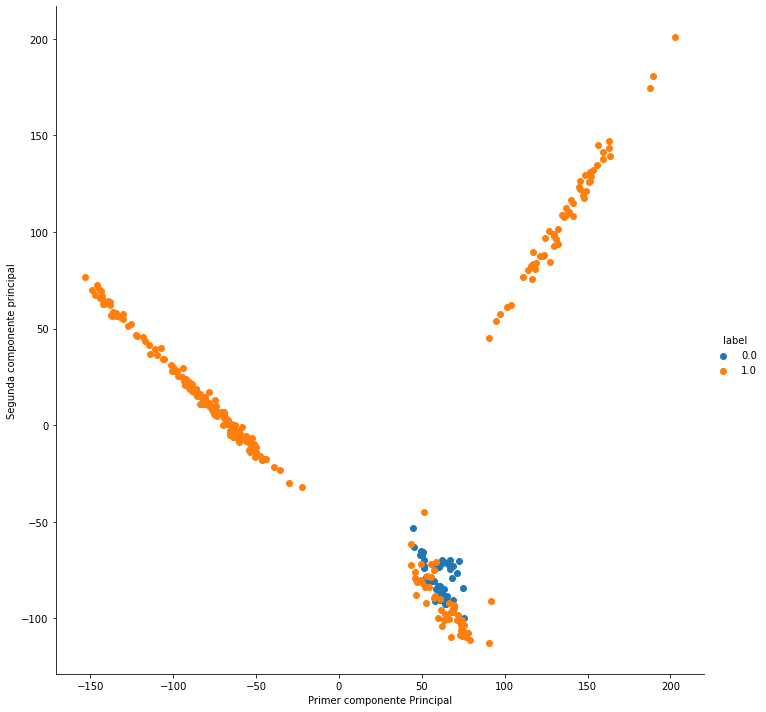

In [41]:
import pandas as pd
import seaborn as sn
pca_df = pd.DataFrame(data=pca_data, columns=("Primer componente Principal", "Segunda componente principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=10).map(plt.scatter, 'Primer componente Principal', 'Segunda componente principal').add_legend()
#plt.xlim(0, 100)
#plt.ylim(-150, -50)
plt.grid=True
#for i in range(len(pca_data)):
#    if(templa[i]==1.):
#        plt.text(pca_data[i][0],pca_data[i][1],'B')
#    elif(templa[i]==0.):
#        plt.text(pca_data[i][0],pca_data[i][1],'O')
plt.show()

In [59]:
grupopca=[]
for i in range(len(pca_data2)):
    if pca_data2[i][0]>0 and pca_data2[i][0]<100 and pca_data2[i][1]<0:
        if namesAll[i] in bnames:
            print(namesAll[i])
            grupopca.append(namesAll[i])

HD29248
HD14818
HD25141
HD14143
HD37128
HD156491
HD36629
HD191243
HD69686
HD38771
HD87901
HD223229
HD34085
HD37744
HD212222
HD23180
HD114376
HD36960
HD206165
HD37023
HD36351
HD54764
HD218537
HD37481
HD31327
HD34989
HD214432
HD176162
HD209419
HD204172
HD36591
HD158304
HD2905
HD35299
HD36430
HD188665
HD36822
HD35912
HD135485
HD36959
HD36862
HD37020
HD36285
HD35468
HD182568
HD24398
HD35039
HD10362
HD190603
HD196740
HD37209
HD37042
HD179406


[]

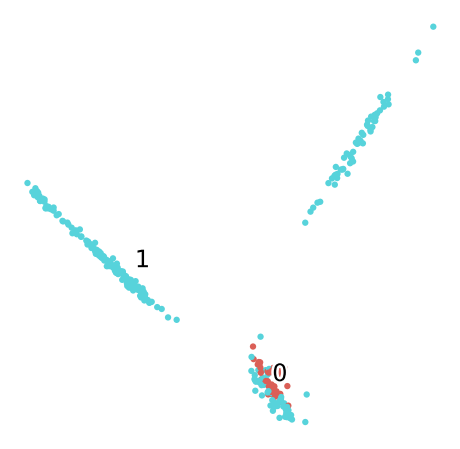

In [34]:
modelos.fashion_scatter(pca_data2,templa)
plt.plot()

In [52]:
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
import time
time_start = time.time()
RS=123
fashion_tsne = TSNE(random_state=RS).fit_transform(x_std)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 7.505135774612427 seconds


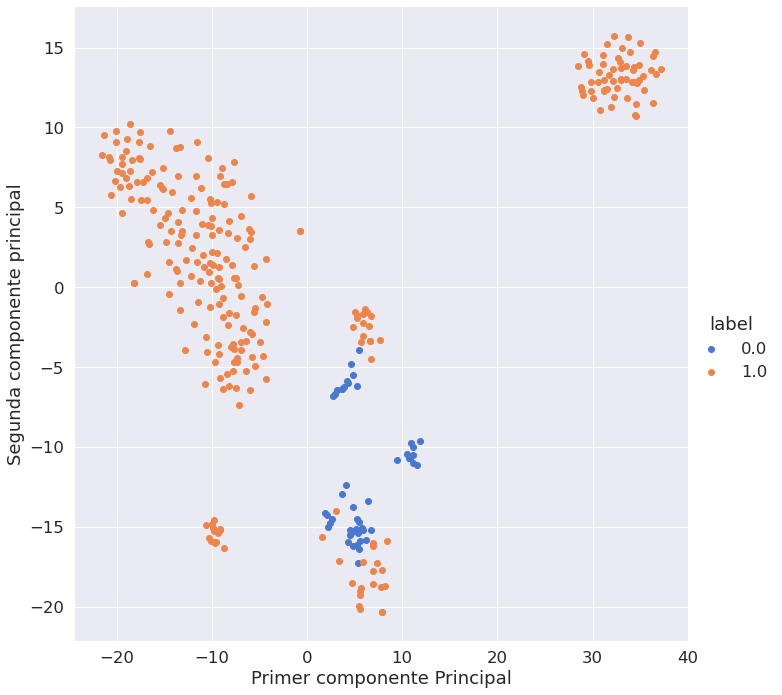

In [57]:
tsne_data = np.vstack((fashion_tsne.T, templa)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Primer componente Principal", "Segunda componente principal", "label"))
sn.FacetGrid(tsne_df, hue="label", height=10).map(plt.scatter, 'Primer componente Principal', 'Segunda componente principal').add_legend()
#plt.xlim(0, 100)
#plt.ylim(-150, -50)
plt.grid=True
#for i in range(len(pca_data)):
#    if(templa[i]==1.):
#        plt.text(pca_data[i][0],pca_data[i][1],'B')
#    elif(templa[i]==0.):
#        plt.text(pca_data[i][0],pca_data[i][1],'O')
plt.show()

[]

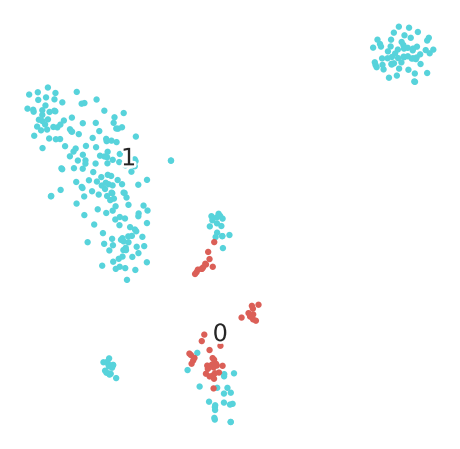

In [53]:
sn.set_style('darkgrid')
sn.set_palette('muted')
sn.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
modelos.fashion_scatter(fashion_tsne, templa)
plt.plot()

In [61]:
grupotsne=[]
for i in range(len(pca_data2)):
    if fashion_tsne[i][0]>0 and fashion_tsne[i][0]<20 and fashion_tsne[i][1]<0:
        if namesAll[i] in bnames:
            print(namesAll[i])
            grupotsne.append(namesAll[i])

HD29248
HD14818
HD25141
HD14143
HD37128
HD36629
HD191243
HD69686
HD38771
HD34085
HD37744
HD23180
HD36960
HD206165
HD37023
HD36351
HD54764
HD37481
HD31327
HD34989
HD204172
HD36591
HD2905
HD35299
HD36430
HD36822
HD35912
HD36959
HD36862
HD37020
HD36285
HD35468
HD24398
HD35039
HD190603
HD37209
HD37042


In [62]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(x_std)
embedding.shape

(328, 2)

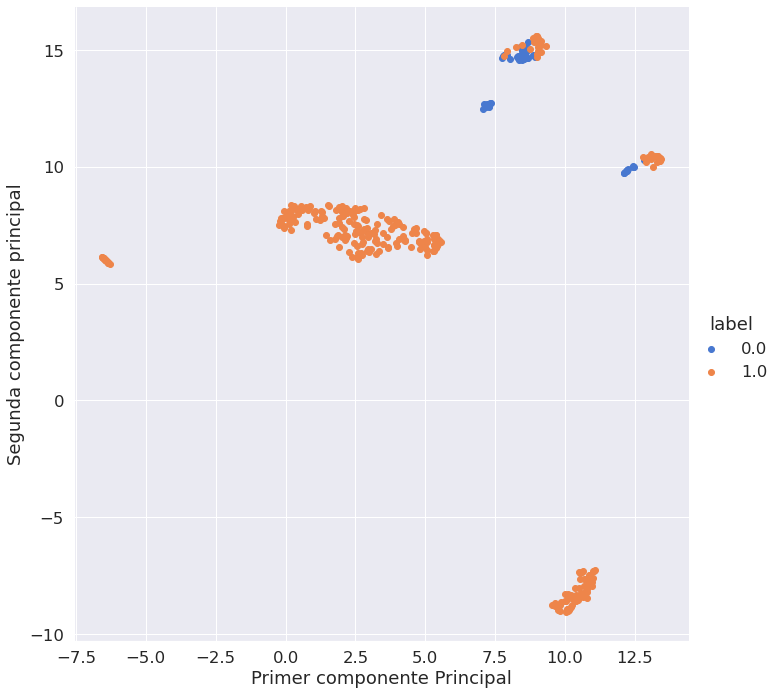

In [64]:
umap_data = np.vstack((embedding.T, templa)).T
umap_df = pd.DataFrame(data=umap_data, columns=("Primer componente Principal", "Segunda componente principal", "label"))
sn.FacetGrid(umap_df, hue="label", height=10).map(plt.scatter, 'Primer componente Principal', 'Segunda componente principal').add_legend()
#plt.xlim(0, 100)
#plt.ylim(-150, -50)
plt.grid=True
#for i in range(len(pca_data)):
#    if(templa[i]==1.):
#        plt.text(pca_data[i][0],pca_data[i][1],'B')
#    elif(templa[i]==0.):
#        plt.text(pca_data[i][0],pca_data[i][1],'O')
plt.show()

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(8.417822, 14.578114, '0'), Text(3.9305115, 7.092813, '1')])

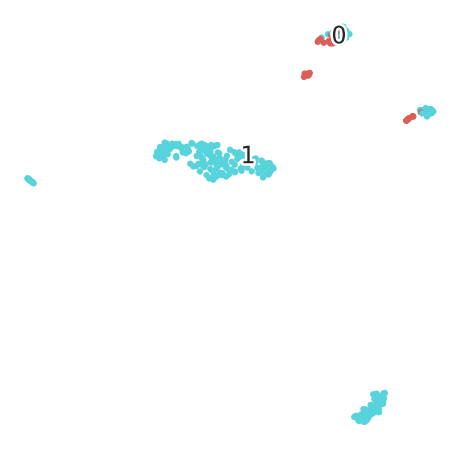

In [65]:
modelos.fashion_scatter(embedding, templa)

In [66]:
grupoumap=[]
for i in range(len(pca_data2)):
    if embedding[i][0]>5 and embedding[i][0]<13 and embedding[i][1]>5:
        if namesAll[i] in bnames:
            print(namesAll[i])
            grupoumap.append(namesAll[i])

HD29248
HD186882
HD14818
HD16046
HD21279
HD21931
HD25141
HD14143
HD37128
HD218045
HD191243
HD198001
HD69686
HD15318
HD38771
HD155711
HD34085
HD23873
HD38899
HD23180
HD40626
HD206165
HD37023
HD23219
HD36351
HD54764
HD37481
HD16350
HD31327
HD10982
HD204172
HD23568
HD18538
HD26171
HD2905
HD36822
HD14171
HD222661
HD37020
HD35468
HD45380
HD24398
HD10390
HD190603
HD37209
HD37042


In [67]:
import trimap
embedding = trimap.TRIMAP(n_inliers=20,
                          n_outliers=10,
                          n_random=10,
                          weight_adj=1000.0).fit_transform(x_std)
embedding.shape

TRIMAP(n_inliers=20, n_outliers=10, n_random=10, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=1000.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 328 points with dimension 36000
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 96.801, Violated triplets: 0.1405
Iteration:  200, Loss: 93.390, Violated triplets: 0.1356
Iteration:  300, Loss: 91.121, Violated triplets: 0.1323
Iteration:  400, Loss: 89.558, Violated triplets: 0.1300
Elapsed time: 0:00:01.565337


(328, 2)

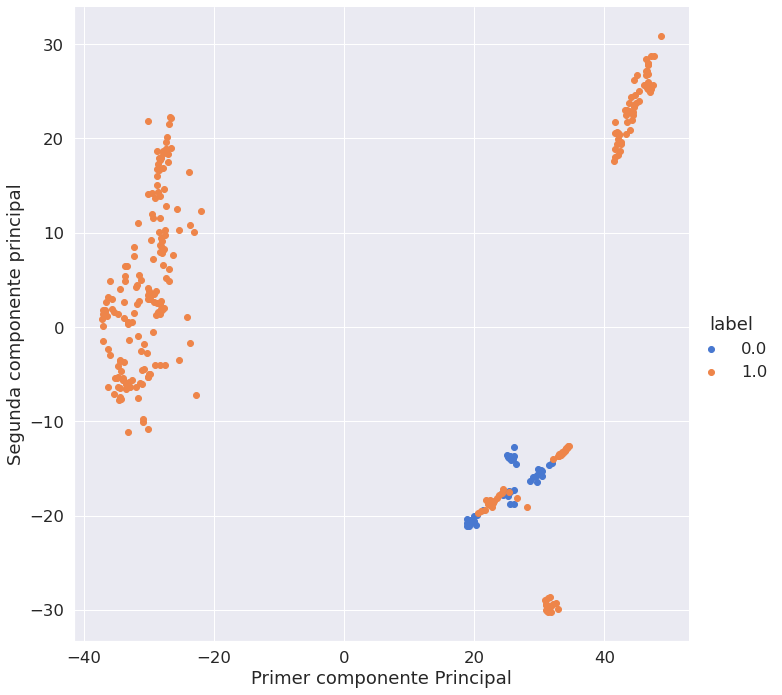

In [70]:
trimap_data = np.vstack((embedding.T, templa)).T
umap_df = pd.DataFrame(data=trimap_data, columns=("Primer componente Principal", "Segunda componente principal", "label"))
sn.FacetGrid(umap_df, hue="label", height=10).map(plt.scatter, 'Primer componente Principal', 'Segunda componente principal').add_legend()
#plt.xlim(0, 100)
#plt.ylim(-150, -50)
plt.grid=True
#for i in range(len(pca_data)):
#    if(templa[i]==1.):
#        plt.text(pca_data[i][0],pca_data[i][1],'B')
#    elif(templa[i]==0.):
#        plt.text(pca_data[i][0],pca_data[i][1],'O')
plt.show()

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(25.393333, -17.398148, '0'), Text(-27.525122, 2.949831, '1')])

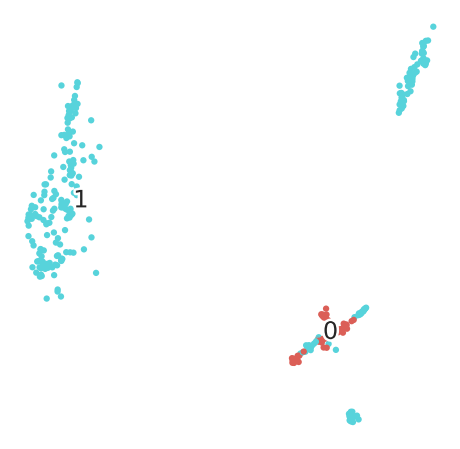

In [68]:
modelos.fashion_scatter(embedding, templa) 

In [72]:
grupotrimap=[]
for i in range(len(pca_data2)):
    if embedding[i][0]>0 and embedding[i][0]<40 and embedding[i][1]<-10:
        if namesAll[i] in bnames:
            print(namesAll[i])
            grupotrimap.append(namesAll[i])

HD29248
HD14818
HD25141
HD14143
HD37128
HD156491
HD36629
HD191243
HD69686
HD38771
HD87901
HD223229
HD34085
HD37744
HD212222
HD23180
HD114376
HD36960
HD206165
HD37023
HD36351
HD54764
HD218537
HD37481
HD31327
HD34989
HD214432
HD176162
HD209419
HD204172
HD36591
HD158304
HD2905
HD35299
HD36430
HD188665
HD36822
HD35912
HD135485
HD36959
HD36862
HD37020
HD36285
HD35468
HD182568
HD24398
HD35039
HD10362
HD190603
HD196740
HD37209
HD37042
HD179406


In [73]:
print(len(grupopca),len(grupotsne),len(grupoumap),len(grupotrimap))

53 37 46 53


In [82]:
for i in range(len(grupotsne)):
    if grupotsne[i] in grupotrimap:
        if grupotsne[i] in grupoumap:
            if grupotsne[i] in grupotrimap:
                print(namesAll[i])

HD209008
HD189090
HD29248
HD186882
HD37320
HD216200
HD37055
HD37643
HD186568
HD14818
HD29335
HD17743
HD198513
HD18537
HD34656
HD51688
HD198183
HD161984
HD207840
HD21931
HD135230
HD192907
HD25141
HD4382
HD14143
